This notebook will analyze the mass spectroscopy take from DINeC experiment and plot the results.

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [92]:
# Data is stored in .xy files in the dinec folder. The .xy files are two columns separated by a space. First column is m/Z, second column is intensity.
atII_ref_1 = np.array(pd.read_csv('dinec/01_pos5_ATIIRef_pos00.xy', sep=' ', header=None))
atII_ref_2 = np.array(pd.read_csv('dinec/10_pos5_ATIIREF_pos00.xy', sep=' ', header=None))

glas_0min = np.array(pd.read_csv('dinec/02_pos4_Glas_0min_pos00.xy', sep=' ', header=None))
glas_15min = np.array(pd.read_csv('dinec/11_pos4_Glas_15min_pos00.xy', sep=' ', header=None))
glas_60min = np.array(pd.read_csv('dinec/13_pos2_Glas_60min_pos00.xy', sep=' ', header=None))

ti02_0min = np.array(pd.read_csv('dinec/03_pos3_TiO2_0min_pos00.xy', sep=' ', header=None))
ti02_15min = np.array(pd.read_csv('dinec/12_pos3_TiO2_15min_pos00.xy', sep=' ', header=None))
ti02_60min = np.array(pd.read_csv('dinec/14_pos1_TiO2_60min_pos00.xy', sep=' ', header=None))

# Import the textmarker spectra; MS-MS spectra
textmarker_full = np.array(pd.read_csv('dinec/04_pos2_Textmarker_pos00.xy', sep=' ', header=None))
textmarker_362 = np.array(pd.read_csv('dinec/04_pos2_Textmarker_iso362_pos00.xy', sep=' ', header=None))
textmarker_362_80 = np.array(pd.read_csv('dinec/04_pos2_Textmarker_iso362_A0-80_pos00.xy', sep=' ', header=None))
textmarker_429 = np.array(pd.read_csv('dinec/04_pos2_Textmarker_iso429_pos00.xy', sep=' ', header=None))
textmarker_429_85 = np.array(pd.read_csv('dinec/04_pos2_Textmarker_iso429_A0-85_pos00.xy', sep=' ', header=None))
textmarker_471 = np.array(pd.read_csv('dinec/04_pos2_Textmarker_iso471_pos00.xy', sep=' ', header=None))
textmarker_471_80 = np.array(pd.read_csv('dinec/04_pos2_Textmarker_iso471_A0-80_pos00.xy', sep=' ', header=None))


## Auswertung

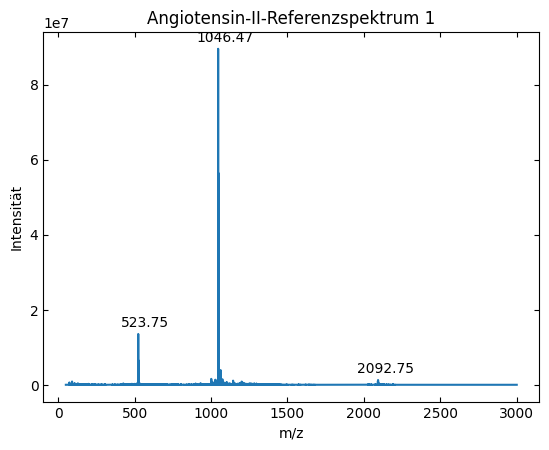

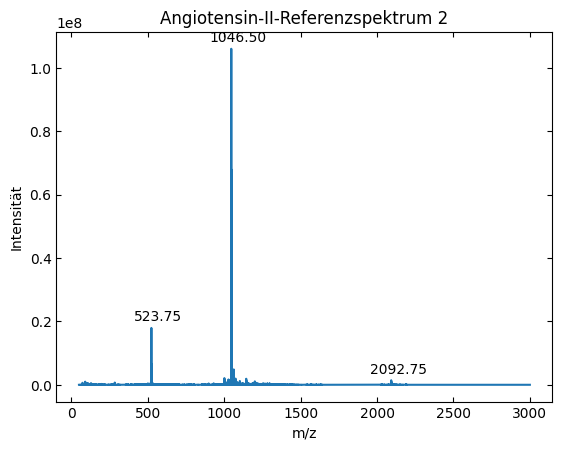

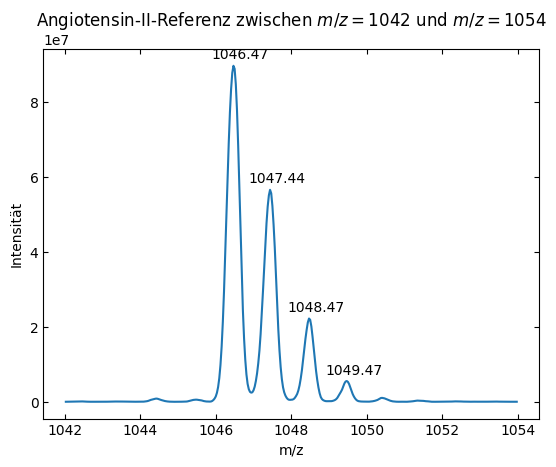

In [93]:
def plot_peaks(ax, data, count=3, distance=5000, prominence=100):
    peaks, _ = scipy.signal.find_peaks(data[:, 1], distance=distance, prominence=prominence)
    # Sort peaks by intensity
    peaks = peaks[np.argsort(data[peaks, 1])][::-1]

    for peak in peaks[:count]:
        # Get the m/z value corresponding to the peak 
        mz = data[peak][0]
        ax.annotate(f'{mz:.2f}', (data[peak][0], data[peak][1]), textcoords="offset points", xytext=(5, 5), ha='center')
        

# Stellen Sie die Spektren der ATII-Referenz aus jedem Messzyklus dar
fig, ax = plt.subplots()
ax.plot(atII_ref_1[:, 0], atII_ref_1[:, 1], label='ATII-Ref 1')
plot_peaks(ax, atII_ref_1, distance=5000, prominence=100)
ax.set_title('Angiotensin-II-Referenzspektrum 1')
ax.set_xlabel('m/z')
ax.set_ylabel('Intensität')
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
plt.savefig('dinec/atII_ref_1.png')

fig, ax = plt.subplots()
ax.plot(atII_ref_2[:, 0], atII_ref_2[:, 1], label='ATII-Ref 2')
plot_peaks(ax, atII_ref_2, distance=5000, prominence=100)
ax.set_title('Angiotensin-II-Referenzspektrum 2')
ax.set_xlabel('m/z')
ax.set_ylabel('Intensität')
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
plt.savefig('dinec/atII_ref_2.png')

# Wählen Sie eines der Spektren aus und stellen Sie den Bereich m/z = 1042 bis m/z = 1054 im Detail dar
atII_ref_1_zoom = atII_ref_1[(atII_ref_1[:, 0] > 1042) & (atII_ref_1[:, 0] < 1054)]
fig, ax = plt.subplots()
ax.plot(atII_ref_1_zoom[:, 0], atII_ref_1_zoom[:, 1], label='ATII-Ref 1')
plot_peaks(ax, atII_ref_1_zoom, count=4, distance=1, prominence=1)
ax.set_title('Angiotensin-II-Referenz zwischen $m/z = 1042$ und $m/z = 1054$')
ax.set_xlabel('m/z')
ax.set_ylabel('Intensität')
ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top
plt.savefig('dinec/atII_ref_1_zoom.png')

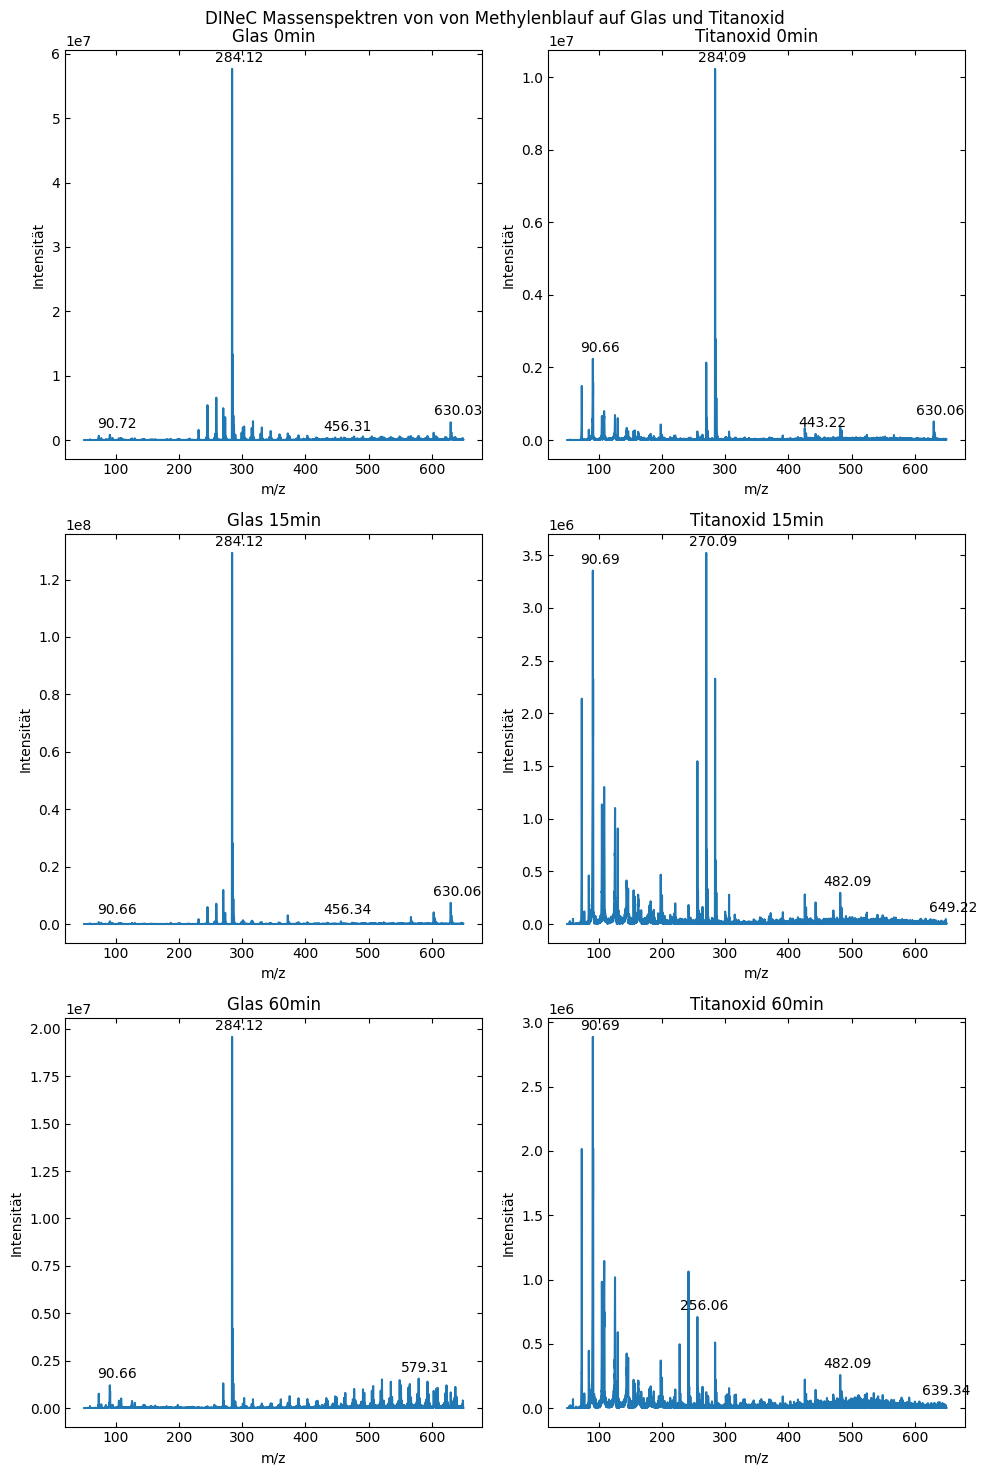

In [94]:
# Stellen Sie die Daten Ihrer mit DINeC vermessenen Methylenblau-Proben in geeigneter Form dar.

def set_common_attr(ax):
    ax.set_xlabel('m/z')
    ax.set_ylabel('Intensität')
    ax.tick_params(direction='in', top=True, right=True) # Add ticks to the right and top

# Cutoff the data at m/z = 1500
cutoff = 650
peaks_count = 10
glas_0min = glas_0min[glas_0min[:, 0] < cutoff]
glas_15min = glas_15min[glas_15min[:, 0] < cutoff]
glas_60min = glas_60min[glas_60min[:, 0] < cutoff]
ti02_0min = ti02_0min[ti02_0min[:, 0] < cutoff]
ti02_15min = ti02_15min[ti02_15min[:, 0] < cutoff]
ti02_60min = ti02_60min[ti02_60min[:, 0] < cutoff]

# Plot the three glas spectra and the three TiO2 spectra in one plot next to each other
fig, ax = plt.subplots(3, 2 , figsize=(10, 15))
fig.suptitle('DINeC Massenspektren von von Methylenblauf auf Glas und Titanoxid')
ax[0, 0].plot(glas_0min[:, 0], glas_0min[:, 1], label='Methylenblau auf Glas 0min Belichtungszeit')
ax[0, 0].set_title('Glas 0min')
set_common_attr(ax[0, 0])
plot_peaks(ax[0, 0], glas_0min, count=peaks_count)
ax[1, 0].plot(glas_15min[:, 0], glas_15min[:, 1], label='Methylenblau auf Glas 15min Belichtungszeit')
ax[1, 0].set_title('Glas 15min')
set_common_attr(ax[1, 0])
plot_peaks(ax[1, 0], glas_15min, count=peaks_count)
ax[2, 0].plot(glas_60min[:, 0], glas_60min[:, 1], label='Methylenblau auf Glas 60min Belichtungszeit')
ax[2, 0].set_title('Glas 60min')
set_common_attr(ax[2, 0])
plot_peaks(ax[2, 0], glas_60min, count=peaks_count)
ax[0, 1].plot(ti02_0min[:, 0], ti02_0min[:, 1], label='Methylenblau auf Titanoxid 0min Belichtungszeit')
ax[0, 1].set_title('Titanoxid 0min')
set_common_attr(ax[0, 1])
plot_peaks(ax[0, 1], ti02_0min, count=peaks_count)
ax[1, 1].plot(ti02_15min[:, 0], ti02_15min[:, 1], label='Methylenblau auf Titanoxid 15min Belichtungszeit')
ax[1, 1].set_title('Titanoxid 15min')
set_common_attr(ax[1, 1])
plot_peaks(ax[1, 1], ti02_15min, count=peaks_count)
ax[2, 1].plot(ti02_60min[:, 0], ti02_60min[:, 1], label='Methylenblau auf Titanoxid 60min Belichtungszeit')
ax[2, 1].set_title('Titanoxid 60min')
set_common_attr(ax[2, 1])
plot_peaks(ax[2, 1], ti02_60min, count=peaks_count)
fig.tight_layout()
plt.savefig('dinec/glas_ti02.png')

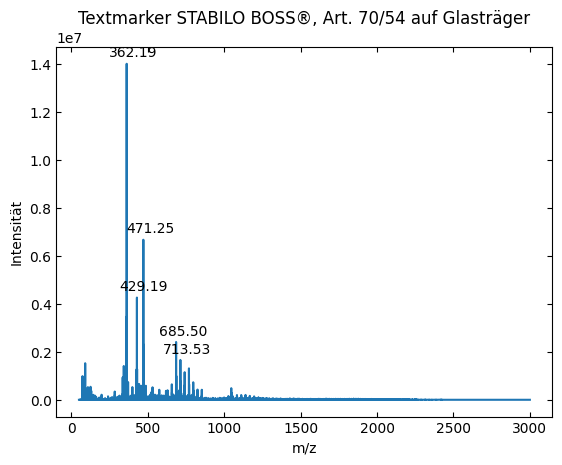

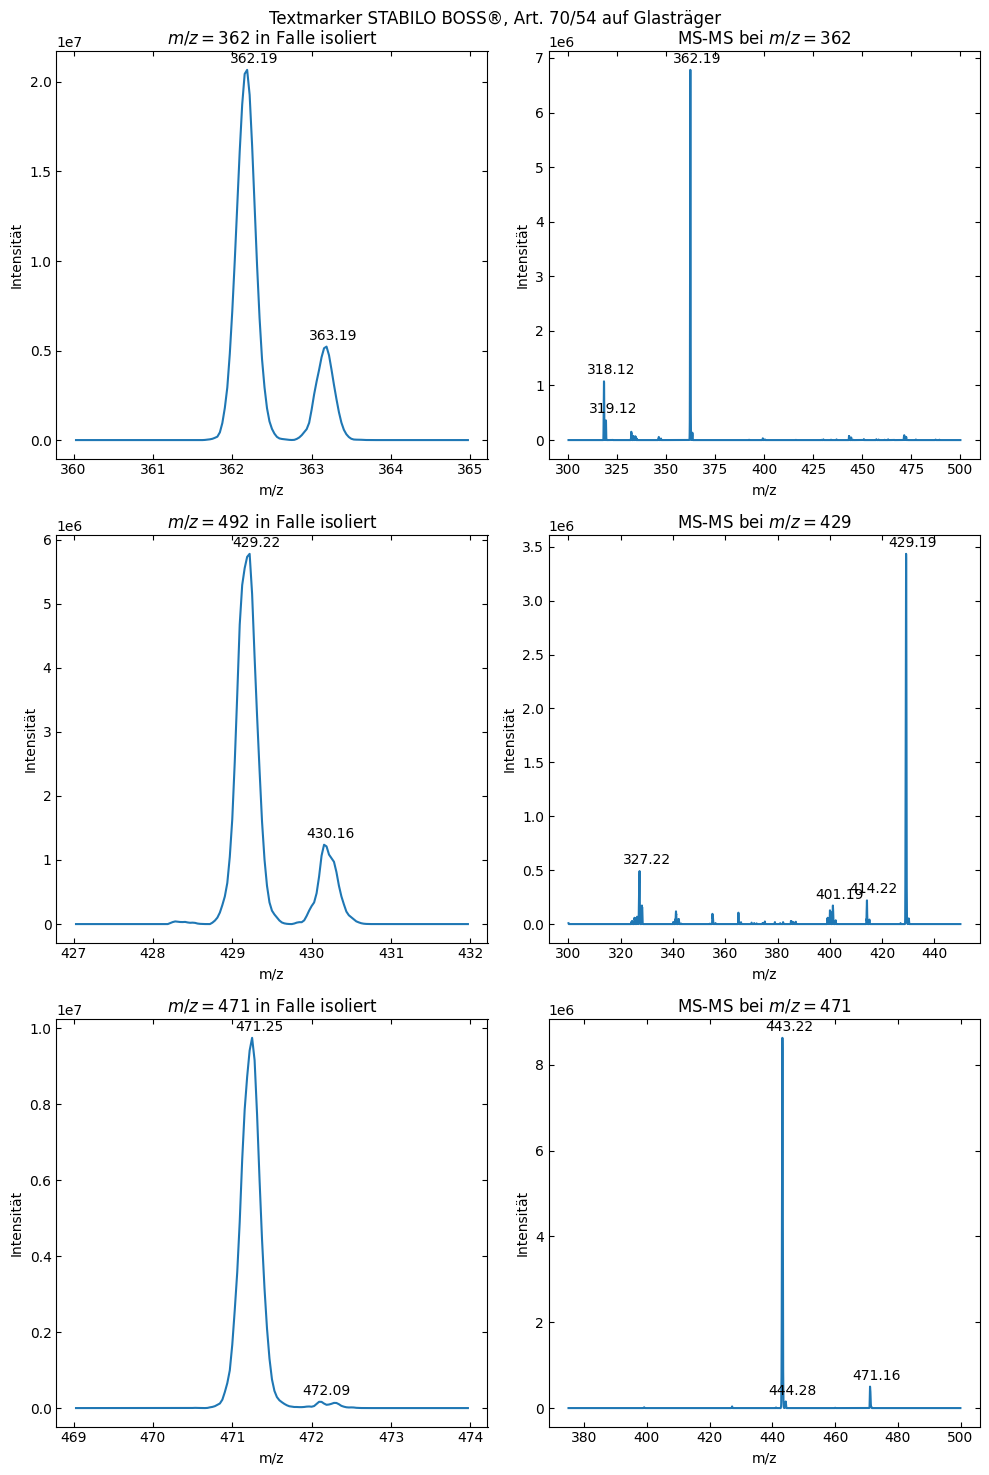

In [95]:
# Plot the full spectrum of the textmarker
fig, ax = plt.subplots()
ax.plot(textmarker_full[:, 0], textmarker_full[:, 1], label='Textmarker')
ax.set_title('Textmarker STABILO BOSS®, Art. 70/54 auf Glasträger')
set_common_attr(ax)
plot_peaks(ax, textmarker_full, count=5, distance=100)
plt.savefig('dinec/textmarker_full.png')

# Only use data between m/z = 300 and m/z = 600
textmarker_362 = textmarker_362[(textmarker_362[:, 0] > 360) & (textmarker_362[:, 0] < 365)]
textmarker_429 = textmarker_429[(textmarker_429[:, 0] > 427) & (textmarker_429[:, 0] < 432)]
textmarker_471 = textmarker_471[(textmarker_471[:, 0] > 469) & (textmarker_471[:, 0] < 474)]
textmarker_362_80 = textmarker_362_80[(textmarker_362_80[:, 0] > 300) & (textmarker_362_80[:, 0] < 500)]
textmarker_429_85 = textmarker_429_85[(textmarker_429_85[:, 0] > 300) & (textmarker_429_85[:, 0] < 450)]
textmarker_471_80 = textmarker_471_80[(textmarker_471_80[:, 0] > 375) & (textmarker_471_80[:, 0] < 500)]

# Plot the three isotopes of the textmarker
fig, ax = plt.subplots(3, 2 , figsize=(10, 15))
fig.suptitle('Textmarker STABILO BOSS®, Art. 70/54 auf Glasträger')
ax[0, 0].plot(textmarker_362[:, 0], textmarker_362[:, 1])
ax[0, 0].set_title('$m/z = 362$ in Falle isoliert')
set_common_attr(ax[0, 0])
plot_peaks(ax[0, 0], textmarker_362, count=2, distance=1)

ax[1, 0].plot(textmarker_429[:, 0], textmarker_429[:, 1])
ax[1, 0].set_title('$m/z = 492$ in Falle isoliert')
set_common_attr(ax[1, 0])
plot_peaks(ax[1, 0], textmarker_429, count=2, distance=1)

ax[2, 0].plot(textmarker_471[:, 0], textmarker_471[:, 1])
ax[2, 0].set_title('$m/z = 471$ in Falle isoliert')
set_common_attr(ax[2, 0])
plot_peaks(ax[2, 0], textmarker_471, count=2, distance=1)

ax[0, 1].plot(textmarker_362_80[:, 0], textmarker_362_80[:, 1])
ax[0, 1].set_title('MS-MS bei $m/z = 362$')
set_common_attr(ax[0, 1])
plot_peaks(ax[0, 1], textmarker_362_80, count=3, distance=10, prominence=1)

ax[1, 1].plot(textmarker_429_85[:, 0], textmarker_429_85[:, 1])
ax[1, 1].set_title('MS-MS bei $m/z = 429$')
set_common_attr(ax[1, 1])
plot_peaks(ax[1, 1], textmarker_429_85, count=4, distance=40, prominence=1)

ax[2, 1].plot(textmarker_471_80[:, 0], textmarker_471_80[:, 1])
ax[2, 1].set_title('MS-MS bei $m/z = 471$')
set_common_attr(ax[2, 1])
plot_peaks(ax[2, 1], textmarker_471_80, count=3, distance=10, prominence=1)

fig.tight_layout()
plt.savefig('dinec/textmarker_msms.png')